# En 2D

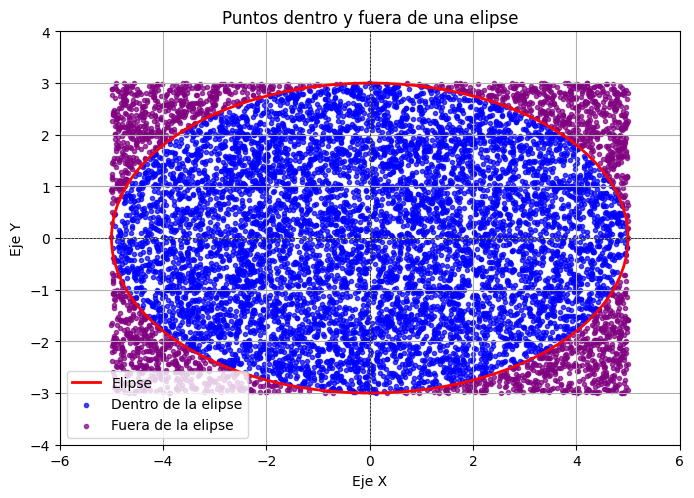

Probabilidad de que un punto aleatorio esté dentro de la elipse: 0.7727
Tiempo de ejecución: 0.000010 segundos


In [67]:
#Números aleatorios dentro y fuera de una elipse
import numpy as np
import matplotlib.pyplot as plt
import random

def generar_puntos_elipse(a, b, num_puntos):
    puntos_dentro = []
    puntos_fuera = []
    
    for _ in range(num_puntos):
        x = random.uniform(-a, a)
        y = random.uniform(-b, b)
        
        if (x**2)/(a**2) + (y**2)/(b**2) <= 1:
            puntos_dentro.append((x, y))
        else:
            puntos_fuera.append((x, y))
    
    return puntos_dentro, puntos_fuera

def graficar_elipse_y_puntos(a, b, puntos_dentro, puntos_fuera):
    theta = np.linspace(0, 2*np.pi, 100)
    x_elipse = a * np.cos(theta)
    y_elipse = b * np.sin(theta)

    plt.figure(figsize=(8, 6))
    plt.plot(x_elipse, y_elipse, label='Elipse', color='red', linewidth=2, linestyle='-')
    
    if puntos_dentro:
        x_dentro, y_dentro = zip(*puntos_dentro)
        plt.scatter(x_dentro, y_dentro, color='blue', label='Dentro de la elipse', alpha=0.7, marker='.')
    
    if puntos_fuera:
        x_fuera, y_fuera = zip(*puntos_fuera)
        plt.scatter(x_fuera, y_fuera, color='purple', label='Fuera de la elipse', alpha=0.7, marker='.')
    
    plt.xlim(-a-1, a+1)
    plt.ylim(-b-1, b+1)
    plt.axhline(0, color='black',linewidth=0.5, ls='--')
    plt.axvline(0, color='black',linewidth=0.5, ls='--')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Puntos dentro y fuera de una elipse')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.legend()
    plt.grid()
    plt.show()

# Parámetros de la elipse
a = 5  # Semieje mayor
b = 3  # Semieje menor
#num_puntos = 1000  # Número de puntos a generar
num_puntos = 10000  # Número de puntos a generar
puntos_dentro, puntos_fuera = generar_puntos_elipse(a, b, num_puntos)
graficar_elipse_y_puntos(a, b, puntos_dentro, puntos_fuera)
probabilidad_dentro = len(puntos_dentro) / num_puntos
print(f'Probabilidad de que un punto aleatorio esté dentro de la elipse: {probabilidad_dentro:.4f}')
#Tiempo de la simulación:
import time
start_time = time.time()
end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time:.6f} segundos")



# En 3D

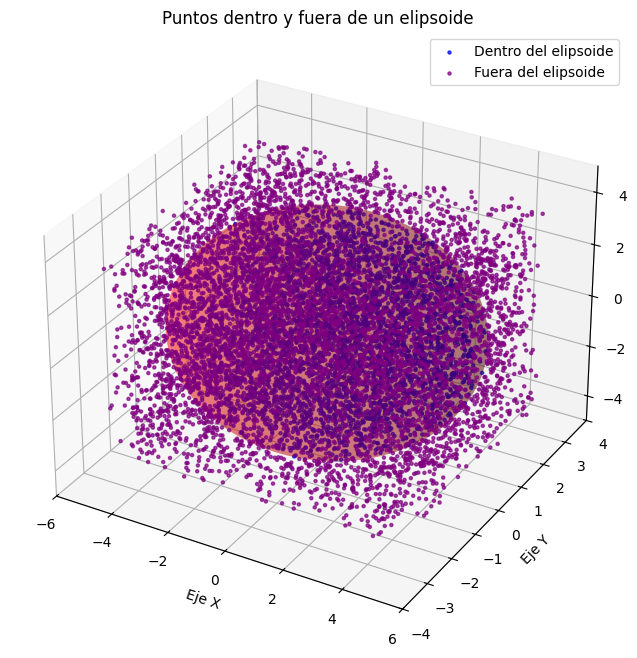

Probabilidad de que un punto aleatorio esté dentro del elipsoide: 0.5293
Tiempo de ejecución: 0.000012 segundos


In [68]:
#Ahora en 3D
from mpl_toolkits.mplot3d import Axes3D
def generar_puntos_elipsoide(a, b, c, num_puntos):
    puntos_dentro = []
    puntos_fuera = []
    
    for _ in range(num_puntos):
        x = random.uniform(-a, a)
        y = random.uniform(-b, b)
        z = random.uniform(-c, c)
        
        if (x**2)/(a**2) + (y**2)/(b**2) + (z**2)/(c**2) <= 1:
            puntos_dentro.append((x, y, z))
        else:
            puntos_fuera.append((x, y, z))
    
    return puntos_dentro, puntos_fuera
def graficar_elipsoide_y_puntos(a, b, c, puntos_dentro, puntos_fuera):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x_elipsoide = a * np.outer(np.cos(u), np.sin(v))
    y_elipsoide = b * np.outer(np.sin(u), np.sin(v))
    z_elipsoide = c * np.outer(np.ones(np.size(u)), np.cos(v))

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_elipsoide, y_elipsoide, z_elipsoide, color='red', alpha=0.3)

    if puntos_dentro:
        x_dentro, y_dentro, z_dentro = zip(*puntos_dentro)
        ax.scatter(x_dentro, y_dentro, z_dentro, color='blue', label='Dentro del elipsoide', alpha=0.7, marker='.')
    
    if puntos_fuera:
        x_fuera, y_fuera, z_fuera = zip(*puntos_fuera)
        ax.scatter(x_fuera, y_fuera, z_fuera, color='purple', label='Fuera del elipsoide', alpha=0.7, marker='.')

    ax.set_xlim([-a-1, a+1])
    ax.set_ylim([-b-1, b+1])
    ax.set_zlim([-c-1, c+1])
    ax.set_title('Puntos dentro y fuera de un elipsoide')
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')
    ax.legend()
    plt.show()
# Parámetros del elipsoide
a = 5  # Semieje mayor
b = 3  # Semieje medio
c = 4  # Semieje menor
num_puntos = 10000  # Número de puntos a generar
puntos_dentro, puntos_fuera = generar_puntos_elipsoide(a, b, c, num_puntos)
graficar_elipsoide_y_puntos(a, b, c, puntos_dentro, puntos_fuera)
probabilidad_dentro = len(puntos_dentro) / num_puntos
print(f'Probabilidad de que un punto aleatorio esté dentro del elipsoide: {probabilidad_dentro:.4f}')
#Tiempo de la simulación:
start_time = time.time()
end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time:.6f} segundos")


$$
\int_{a}^{b} x^{2} \,dx = \frac{b^{3}}{3}-\frac{a^{3}}{3}
$$
$$
\int_{a}^{b} x^{2} \,dx \approx \sum_{i=1}^{N} f_i dx = (b-a)\frac{\sum_{i=1}^{N} f_i}{N}
$$
$$
dx \approx \frac{b-a}{N}
$$

$$
\int_{a}^{b} x^{2} \,dx \approx (b-a)<f>
$$

In [709]:
import numpy as np

def func1(x):
    # f(x) = x^2
    return x**2
def func1_integral(a,b):
    # \int_a^b x^2 dx
    return (1/3)*(b**3 - a**3)
def MonteCarlo(func, a, b, N=50000):
    #Monte Carlo para aproximar la integral de func en [a,b]
    vals = np.random.uniform(a, b, N)
    y = [func(val) for val in vals] #Evaluar la función en los puntos aleatorios
    y_mean = np.sum(y)/N
    integral = (b - a) * y_mean
    return integral
print(f"Integral: {func1_integral(-2,2):.4f}")
print(f"Monte Carlo: {MonteCarlo(func1, -2, 2):.4f}")
#Tiempo de la simulación:
start_time = time.time()
end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time:.6f} segundos")
#Error relativo
error_relativo = abs(func1_integral(-2,2) - MonteCarlo(func1, -2, 2)) / abs(func1_integral(-2,2))
print(f"Error relativo: {error_relativo:.6f}")

Integral: 5.3333
Monte Carlo: 5.3496
Tiempo de ejecución: 0.000017 segundos
Error relativo: 0.000474


# Integral de la función gaussiana

La función gaussiana, también conocida como la campana de Gauss, está definida como:

$$
f(x) = e^{-ax^2}
$$

La integral de la función gaussiana en el intervalo $(-\infty, \infty)$ tiene una solución conocida:

$$
\int_{-\infty}^{\infty} e^{-ax^2} dx = \sqrt{\frac{\pi}{a}}
$$

Esta integral es fundamental en probabilidad y estadística, ya que está relacionada con la distribución normal. Sin embargo, no tiene una solución elemental en términos de funciones básicas, por lo que se evalúa utilizando métodos numéricos o se expresa en términos de la función error (erf).

En este notebook, podemos aproximar esta integral utilizando el método de Monte Carlo o cualquier otro método numérico. Esto nos permitirá verificar experimentalmente el valor teórico de $\sqrt{\pi}$.

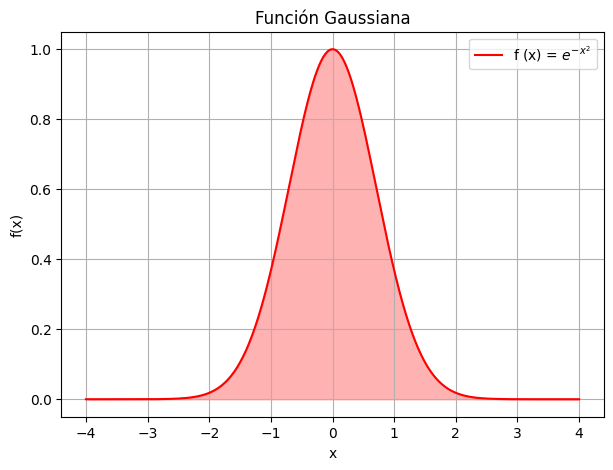

Integral aproximada de la gaussiana en [-4,4]: 1.7792480523
Valor real de la integral: 1.7724538509


In [787]:
import numpy as np
import matplotlib.pyplot as plt

def gaussiana(x):
    return np.exp(-x**2)
def integralCM(func, a, b, N=50000):
    vals = np.random.uniform(a, b, N) # Puntos aleatorios en [a,b]
    y = [func(val) for val in vals] # Evaluar la función en los puntos aleatorios
    y_mean = np.sum(y)/N
    integral = (b - a) * y_mean
    return integral

x = np.linspace(-4, 4, 500)
plt.figure(figsize=(7, 5))
plt.plot(x, gaussiana(x), label='f (x) = $e^{-x^2}$', color='red')
plt.fill_between(x, gaussiana(x), color='red', alpha=0.3)
plt.title('Función Gaussiana')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

print(f'Integral aproximada de la gaussiana en [-4,4]: {integralCM(gaussiana, -4, 4):.10f}')
print(f'Valor real de la integral: {np.sqrt(np.pi):.10f}')


$$
f(x)=\frac{1}{\sqrt{e^{-x}+\sqrt{x}+2x}}
$$

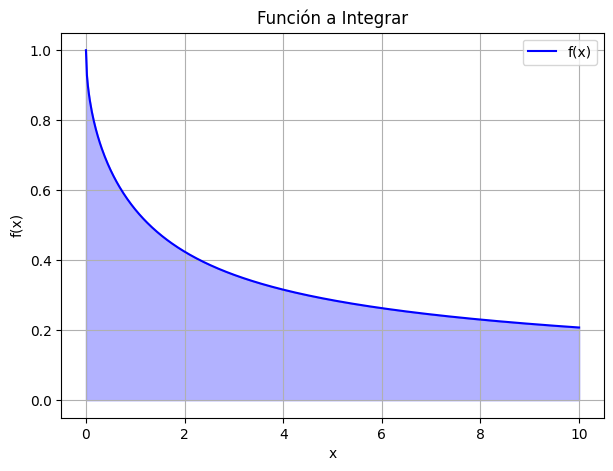

Integral aproximada: 3.3859666656
Tiempo de ejecución: 0.001225 segundos
Valor real de la integral: 3.3854698330
Error relativo: 0.0001467544


In [808]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.integrate as spi

def funcion_a_integrar(x):
    return 1/np.sqrt(np.exp(-x) + np.sqrt(x) + 2*x)
def integral_monte_carlo(func, a, b, N=100000):
    puntos_aleatorios = np.random.uniform(a, b, N)
    valores_funcion = func(puntos_aleatorios)
    promedio = np.mean(valores_funcion)
    integral = (b - a) * promedio
    return integral

x = np.linspace(0, 10, 500)
plt.figure(figsize=(7, 5))
plt.plot(x, funcion_a_integrar(x), label='f(x)', color='blue')
plt.fill_between(x, funcion_a_integrar(x), color='blue', alpha=0.3)
plt.title('Función a Integrar')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()
start_time = time.time()
resultado_integral = integral_monte_carlo(funcion_a_integrar, 0, 10)
end_time = time.time()
print(f'Integral aproximada: {resultado_integral:.10f}')
print(f'Tiempo de ejecución: {end_time - start_time:.6f} segundos')
resultado_real, _ = spi.quad(funcion_a_integrar, 0, 10)
print(f'Valor real de la integral: {resultado_real:.10f}')
error_relativo = abs(resultado_real - resultado_integral) / abs(resultado_real)
print(f'Error relativo: {error_relativo:.10f}')
